In [1]:
# standard import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(6)
hd=pd.read_csv("heart-disease.csv.csv")
from sklearn.model_selection import train_test_split
X = hd.drop(["target"],axis=1)
y =hd["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

##  Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/esitmators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions.

###  Evaluating a model with the `score` method

In [3]:
rfc.score(X_train, y_train)

1.0

In [4]:
rfc.score(X_test, y_test)

0.8032786885245902

In [5]:
## now lets try it out for the Regressor
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"]=pd.Series(boston["target"])
R= boston_df.drop("target",axis=1)
f=boston_df["target"]
from sklearn.model_selection import train_test_split
R_train,R_test,f_train,f_test=train_test_split(R,f,test_size=0.2)

In [6]:
np.random.seed(6)
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(R_train,f_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [7]:
clf.score(R_train,f_train)

0.9816910737866339

In [8]:
clf.score(R_test,f_test)

0.8539226868119685

### Evaluating a model using the `scoring` parameter

In [9]:
# it is for the classification problem
from sklearn.model_selection import cross_val_score
cross_val_score(rfc, X, y,cv=5)

array([0.81967213, 0.90163934, 0.80327869, 0.83333333, 0.76666667])

In [10]:
np.random.seed(6)
# Single training and test split score
rfc_single_score = rfc.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
rfc_cross_val_score = np.mean(cross_val_score(rfc, X, y, cv=5))

# Compare the two
rfc_single_score, rfc_cross_val_score

(0.8032786885245902, 0.8082513661202185)

In [11]:
# Default scoring parameter of classifier = mean accuracy
rfc.score(X_test,y_test)

0.8032786885245902

###  Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [12]:
# cross validation score is used for predicting the accuracy 
# here we are using the random forest classifier for the accuracy test
cross_val_score = cross_val_score(rfc, X, y, cv=5)

In [13]:
np.mean(cross_val_score)

0.8182513661202186

In [14]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 81.83%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true postive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1


In [19]:
from sklearn.metrics import roc_curve
y_probs = rfc.predict_proba(X_test)
y_positive_probs = y_probs[:,1]

In [20]:
y_positive_probs[:10]

array([0.36, 0.79, 0.79, 0.23, 0.39, 0.87, 0.13, 0.93, 0.58, 0.95])

In [23]:
# Caculate fpr, tpr and thresholds
fpr,tpr,thresholds = roc_curve(y_test,y_positive_probs)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03225806, 0.03225806, 0.09677419, 0.09677419,
       0.09677419, 0.12903226, 0.16129032, 0.16129032, 0.19354839,
       0.22580645, 0.25806452, 0.25806452, 0.25806452, 0.35483871,
       0.38709677, 0.48387097, 0.5483871 , 0.61290323, 0.67741935,
       0.77419355, 0.90322581, 0.90322581, 1.        ])

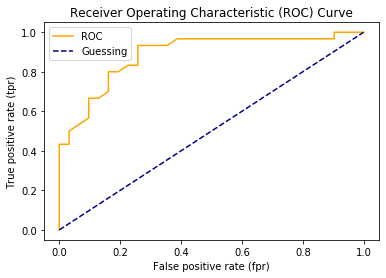

In [25]:
# Create a function for plotting ROC curves

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [27]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_positive_probs)

0.8876344086021506

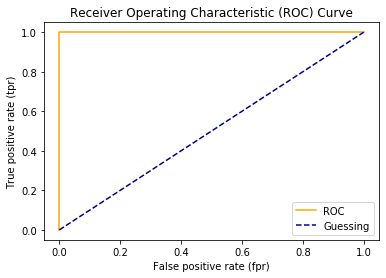

In [28]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [29]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [31]:
from sklearn.metrics import confusion_matrix

y_preds = rfc.predict(X_test)

confusion_matrix(y_test,y_preds)


array([[24,  7],
       [ 5, 25]], dtype=int64)

In [32]:
# visualize the confusion matrix using the cross tab
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,7
1,5,25


In [33]:
len(X_test)

61

In [34]:
24+5+7+25


61

In [36]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda





Solving environment: ...working... done

## Package Plan ##

  environment location: D:\py\ex1\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.10.1             |             py_0         163 KB
    ------------------------------------------------------------
                                           Total:         163 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.10.1-py_0




seaborn-0.10.1       | 163 KB    |            |   0% 
seaborn-0.10.1       | 163 KB    | 9          |  10% 
seaborn-0.10.1       | 163 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


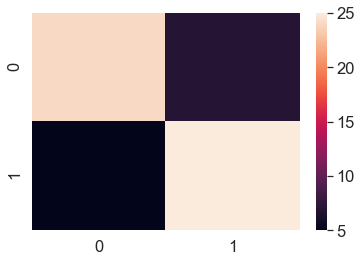

In [37]:
import seaborn as sns

# Set the font scale 
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

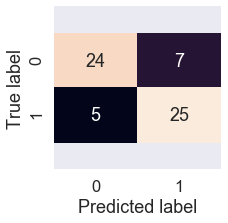

In [38]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes with conf_mat info
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
    # Fix the broken annotations (this happened in Matplotlib 3.1.1)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top-0.5);
    
plot_conf_mat(conf_mat)

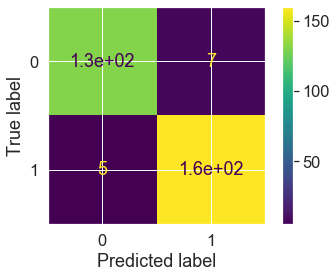

In [39]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rfc, X, y)

**Classification Report**

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        31
           1       0.78      0.83      0.81        30

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [41]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

D:\py\ex1\env\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:
    
* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* **Precision** and **recall** become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall.